In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install youtube-comment-downloader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.5/315.5 kB 5.8 MB/s eta 0:00:00


In [ ]:
from youtube_comment_downloader import YoutubeCommentDownloader
import pandas as pd

downloader = YoutubeCommentDownloader()
comments = []

url = "https://www.youtube.com/watch?v=Ss6ud71pmvQ"  # ganti dengan video kamu
# Vidio/Official iNews/LIVE |Borok Polisi Dibongkar, Mampukah Reformasi Polri Jawab Harapan Publik? | Rakyat Bersuara

# sort_by = 0 (Top comments), 1 (Newest first)
for comment in downloader.get_comments_from_url(url, sort_by=0):
    comments.append({
        'user': comment.get('author'),
        'comment': comment.get('text'),
        'time': comment.get('time'),
        'votes': comment.get('votes')
    })

df = pd.DataFrame(comments)
print("Jumlah komentar:", len(df))
df.head()

Jumlah komentar: 1336


,user,comment,time,votes
0,@arismhvideo4891,"Seorang Mentri keuangan, diwawancara oleh seor...",1 day ago,1.8K
1,@project2226,Ngerasa nguping pembicaraan yang ga seharusnya...,2 days ago,2.6K
2,@alexanderthegreat1466,Ayahku cuman tukang rumput ibuku tukang sapu d...,1 day ago,1.1K
3,@rizky_wacaw,"Pak Purbaya serasa lebih serius ngbrol disini,...",1 day ago,278
4,@duniabahari1695,"Inii baruu sparing partner yg sepadan, penonto...",1 day ago,168


In [ ]:
# # Menyimpan data Frame
# df = pd.DataFrame(comments)
# df.to_csv("youtube_comments_Purbaya X Gita Wirjawan.csv", index=False, encoding='utf-8')
# print("Komentar berhasil disimpan ke 'youtube_comments.csv'")

Komentar berhasil disimpan ke 'youtube_comments.csv'


In [2]:
import pandas as pd
# Tentukan path file CSV
path = "/content/drive/MyDrive/Semester7 2026/Pemrosesan Teks/Analisis Sentimen Comment YouTube Vidio Purbaya(Menku) X Gita Wirjawan/youtube_comments_Purbaya X Gita Wirjawan.csv"
# Membaca data CSV ke dalam DataFrame
df = pd.read_csv(path, encoding='utf-8')
# Menampilkan beberapa baris pertama
print(df.head())

                     user                                            comment  \
0        @arismhvideo4891  Seorang Mentri keuangan, diwawancara oleh seor...   
1            @project2226  Ngerasa nguping pembicaraan yang ga seharusnya...   
2  @alexanderthegreat1466  Ayahku cuman tukang rumput ibuku tukang sapu d...   
3            @rizky_wacaw  Pak Purbaya serasa lebih serius ngbrol disini,...   
4        @duniabahari1695  Inii baruu sparing partner yg sepadan, penonto...   

         time votes  
0   1 day ago  1.8K  
1  2 days ago  2.6K  
2   1 day ago  1.1K  
3   1 day ago   278  
4   1 day ago   168  


In [3]:
# menampilkan dataset yang ada pada data comment
comment = df["comment"]
print(comment.head())

0    Seorang Mentri keuangan, diwawancara oleh seor...
1    Ngerasa nguping pembicaraan yang ga seharusnya...
2    Ayahku cuman tukang rumput ibuku tukang sapu d...
3    Pak Purbaya serasa lebih serius ngbrol disini,...
4    Inii baruu sparing partner yg sepadan, penonto...
Name: comment, dtype: object


Langkah selanjutnya melakukan Preprosesing text pada coloum text


In [4]:
import re
from wordcloud import WordCloud
import nltk
import requests
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer



1.   Cleaning data dan Case Folding



In [5]:
import re
# Pastikan kolom 'comment' ada
if 'comment' in df.columns:
    # Fungsi cleaning & case folding
    def clean_text(text):
        if isinstance(text, str):
            text = text.lower()                             # Case folding (ubah ke huruf kecil)
            text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # Hapus URL
            text = re.sub(r'@\w+|#\w+', '', text)           # Hapus mention dan hashtag
            text = re.sub(r'[^a-zA-Z0-9\s]', '', text)      # Hapus karakter non-alfanumerik
            text = re.sub(r'\s+', ' ', text).strip()        # Hapus spasi berlebih
            return text
        else:
            return ''

    # Terapkan fungsi ke kolom 'comment'
    df['Case Folding'] = df['comment'].apply(clean_text)

    # Lihat hasil
    print(df[['comment', 'Case Folding']].head())
else:
    print("Kolom 'comment' tidak ditemukan di DataFrame.")

                                             comment  \
0  Seorang Mentri keuangan, diwawancara oleh seor...   
1  Ngerasa nguping pembicaraan yang ga seharusnya...   
2  Ayahku cuman tukang rumput ibuku tukang sapu d...   
3  Pak Purbaya serasa lebih serius ngbrol disini,...   
4  Inii baruu sparing partner yg sepadan, penonto...   

                                        Case Folding  
0  seorang mentri keuangan diwawancara oleh seora...  
1  ngerasa nguping pembicaraan yang ga seharusnya...  
2  ayahku cuman tukang rumput ibuku tukang sapu d...  
3  pak purbaya serasa lebih serius ngbrol disini ...  
4  inii baruu sparing partner yg sepadan penonton...  


2.   Filtering (symbol, angka, hastag, mention,
whitespace, stopword removal)



In [6]:
! pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 6.0 MB/s eta 0:00:00


In [7]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
# Inisialisasi stopword remover (Bahasa Indonesia)
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

# Fungsi cleaning dan filtering
def stop_word_remover(text):
    if isinstance(text, str):
        text = text.lower()  # Case folding

        # Hapus URL
        text = re.sub(r'http\S+|www\S+', '', text)

        # Hapus mention & hashtag
        text = re.sub(r'@\w+|#\w+', '', text)

        # Hapus angka
        text = re.sub(r'\d+', '', text)

        # Hapus simbol dan karakter non-alfabet
        text = re.sub(r'[^a-z\s]', '', text)

        # Hapus whitespace berlebih
        text = re.sub(r'\s+', ' ', text).strip()

        # Hapus stopword
        text = stopword.remove(text)

        return text
    else:
        return ''

# Terapkan pada kolom 'comment'
df['stopword removal'] = df['Case Folding'].apply(stop_word_remover)

# Tampilkan hasil
print(df[['Case Folding', 'stopword removal']].head())


                                        Case Folding  \
0  seorang mentri keuangan diwawancara oleh seora...   
1  ngerasa nguping pembicaraan yang ga seharusnya...   
2  ayahku cuman tukang rumput ibuku tukang sapu d...   
3  pak purbaya serasa lebih serius ngbrol disini ...   
4  inii baruu sparing partner yg sepadan penonton...   

                                    stopword removal  
0  seorang mentri keuangan diwawancara seorang ek...  
1  ngerasa nguping pembicaraan ga rakyat biasa de...  
2  ayahku cuman tukang rumput ibuku tukang sapu a...  
3  pak purbaya serasa lebih serius ngbrol disini ...  
4  inii baruu sparing partner yg sepadan penonton...  




3.   Tokenizing (konversi kata didalam kalimat menjadi
bentuk tabel/kolom) dan Lemmatization



In [8]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 19.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=9017d2e10d2b3e8cb082da9dc8dc805875eb3ac7f3ae4a31aa7225722b7505e9
  Stored in directory: /root/.cache/pip/wheels/c1/67/88/e844b5b022812e15a52e4eaa38a1e709e99f06f6639d7e3ba7
Successfully built langdetect


In [9]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import words
from nltk.stem import WordNetLemmatizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from langdetect import detect

# Unduh resource NLTK (pertama kali saja)
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('words')

# Inisialisasi tools
english_words = set(words.words())
lemmatizer_en = WordNetLemmatizer()
stem_factory = StemmerFactory()
stemmer_id = stem_factory.create_stemmer()
stop_factory = StopWordRemoverFactory()
stopword = stop_factory.create_stop_word_remover()

# Fungsi Preprocessing Lengkap
def preprocess_bilingual(text):
    if not isinstance(text, str):
        return ''
     # Tokenizing
    tokens = word_tokenize(text)

    # Lemmatization / Stemming bilingual
    processed_tokens = []
    for token in tokens:
        try:
            lang = detect(token)  # deteksi bahasa per kata
        except:
            lang = "id"  # default ke Indonesia jika tidak terdeteksi

        if lang == 'en' and token in english_words:
            token = lemmatizer_en.lemmatize(token)  # Lemmatization English
        else:
            token = stemmer_id.stem(token)          # Stemming Indonesia

        processed_tokens.append(token)

    return ' '.join(processed_tokens)

df['Lemmatization'] = df['stopword removal'].apply(preprocess_bilingual)

# Token kolom
df['tokens'] = df['Lemmatization'].apply(word_tokenize)

print(df[['stopword removal', 'Lemmatization', 'tokens']].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


                                    stopword removal  \
0  seorang mentri keuangan diwawancara seorang ek...   
1  ngerasa nguping pembicaraan ga rakyat biasa de...   
2  ayahku cuman tukang rumput ibuku tukang sapu a...   
3  pak purbaya serasa lebih serius ngbrol disini ...   
4  inii baruu sparing partner yg sepadan penonton...   

                                       Lemmatization  \
0  orang tri uang wawancara orang ekonom pikir sa...   
1  ngerasa nguping bicara ga rakyat biasa dengar ...   
2  ayah cuman tukang rumput ibu tukang sapu aku l...   
3  pak purbaya serasa lebih serius ngbrol sini te...   
4  ini baruu sparing partner yg padan tonton bera...   

                                              tokens  
0  [orang, tri, uang, wawancara, orang, ekonom, p...  
1  [ngerasa, nguping, bicara, ga, rakyat, biasa, ...  
2  [ayah, cuman, tukang, rumput, ibu, tukang, sap...  
3  [pak, purbaya, serasa, lebih, serius, ngbrol, ...  
4  [ini, baruu, sparing, partner, yg, padan, tont..



4.   Stemming (merubah jadi kata dasar) dari colum stopword removal





In [10]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Inisialisasi
stop_factory = StopWordRemoverFactory()
stopword = stop_factory.create_stop_word_remover()

stem_factory = StemmerFactory()
stemmer = stem_factory.create_stemmer()

# Fungsi preprocessing
def preprocess_text(tokens):
    if isinstance(tokens, list):  # <-- cek jika token berupa list
        text = ' '.join(tokens)   # ubah list -> string
        text = stopword.remove(text)
        text = stemmer.stem(text)
        return text
    elif isinstance(tokens, str):  # kalau sudah string
        text = stopword.remove(tokens)
        text = stemmer.stem(text)
        return text
    else:
        return ''

# Terapkan ke kolom 'tokens'
df['stemming'] = df['tokens'].apply(preprocess_text)

# Lihat hasil
print(df[['tokens', 'stemming']].head())

                                              tokens  \
0  [orang, tri, uang, wawancara, orang, ekonom, p...   
1  [ngerasa, nguping, bicara, ga, rakyat, biasa, ...   
2  [ayah, cuman, tukang, rumput, ibu, tukang, sap...   
3  [pak, purbaya, serasa, lebih, serius, ngbrol, ...   
4  [ini, baruu, sparing, partner, yg, padan, tont...   

                                            stemming  
0  orang tri uang wawancara orang ekonom pikir sa...  
1  ngerasa nguping bicara ga rakyat biasa dengar ...  
2  ayah cuman tukang rumput ibu tukang sapu aku l...  
3  pak purbaya serasa lebih serius ngbrol sini te...  
4  baruu sparing partner yg padan tonton berasaa ...  


! pip install transformer

transformers adalah library open-source buatan perusahaan Hugging Face, yang menyediakan model-model kecerdasan buatan (AI) modern untuk memahami dan menghasilkan bahasa manusia, gambar, suara, bahkan kode.


*Perusahaan Pembuat   
Hugging Face Inc., perusahaan AI asal Paris, Prancis (sekarang juga berbasis di New York).

Mereka fokus pada:

Natural Language Processing (NLP)

Generative AI

Open model ecosystem (seperti BERT, GPT, T5, RoBERTa, DistilBERT, dll.)
*   Fungsinya
| Jenis Tugas                   | Fungsi di `transformers`                   | Contoh Model     |
| ----------------------------- | ------------------------------------------ | ---------------- |
| **Analisis Sentimen**         | `pipeline("sentiment-analysis")`           | BERT, DistilBERT |
| **Penerjemahan Bahasa**       | `pipeline("translation")`                  | T5, MarianMT     |
| **Ringkasan Teks**            | `pipeline("summarization")`                | BART, Pegasus    |
| **Jawaban dari Teks (QA)**    | `pipeline("question-answering")`           | RoBERTa, BERT    |
| **Chatbot / Text Generation** | `pipeline("text-generation")`              | GPT-2, GPT-Neo   |
| **Analisis Gambar (Vision)**  | `pipeline("image-classification")`         | ViT, CLIP        |
| **Speech / Audio**            | `pipeline("automatic-speech-recognition")` | Whisper          |

Ringkasan Otomatis

summarizer = pipeline("summarization")
text = "Artificial Intelligence (AI) has revolutionized many industries..."
print(summarizer(text, max_length=40, min_length=10))

Penerjemahan Bahasa

translator = pipeline("translation_en_to_id")
print(translator("Hugging Face is a leading company in natural language processing."))






5.   Labeling Mengginakan library tranformer



In [13]:
from transformers import pipeline

# Inisialisasi model sentiment analysis
# analyzer = pipeline("sentiment-analysis")

# Memakai model sentimen Bahasa Indonesia,
analyzer = pipeline("sentiment-analysis", model="w11wo/indonesian-roberta-base-sentiment-classifier")

# Terapkan analisis sentimen ke setiap baris kolom 'stemming'
results = df['stemming'].apply(lambda x: analyzer(x)[0] if isinstance(x, str) and x.strip() != "" else {'label': 'UNKNOWN', 'score': 0})

# Tambahkan hasil ke kolom baru
df['sentiment_label'] = results.apply(lambda x: x['label'])
df['sentiment_score'] = results.apply(lambda x: x['score'])

# Tampilkan contoh hasil
print(df[['stemming', 'sentiment_label', 'sentiment_score']].head())

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/328 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cpu


                                            stemming sentiment_label  \
0  orang tri uang wawancara orang ekonom pikir sa...         neutral   
1  ngerasa nguping bicara ga rakyat biasa dengar ...        negative   
2  ayah cuman tukang rumput ibu tukang sapu aku l...        negative   
3  pak purbaya serasa lebih serius ngbrol sini te...        positive   
4  baruu sparing partner yg padan tonton berasaa ...         neutral   

   sentiment_score  
0         0.906869  
1         0.996375  
2         0.891836  
3         0.995929  
4         0.782617  


In [14]:
print(df.head())

                     user                                            comment  \
0        @arismhvideo4891  Seorang Mentri keuangan, diwawancara oleh seor...   
1            @project2226  Ngerasa nguping pembicaraan yang ga seharusnya...   
2  @alexanderthegreat1466  Ayahku cuman tukang rumput ibuku tukang sapu d...   
3            @rizky_wacaw  Pak Purbaya serasa lebih serius ngbrol disini,...   
4        @duniabahari1695  Inii baruu sparing partner yg sepadan, penonto...   

         time votes                                       Case Folding  \
0   1 day ago  1.8K  seorang mentri keuangan diwawancara oleh seora...   
1  2 days ago  2.6K  ngerasa nguping pembicaraan yang ga seharusnya...   
2   1 day ago  1.1K  ayahku cuman tukang rumput ibuku tukang sapu d...   
3   1 day ago   278  pak purbaya serasa lebih serius ngbrol disini ...   
4   1 day ago   168  inii baruu sparing partner yg sepadan penonton...   

                                    stopword removal  \
0  seorang mentri 

In [15]:
sentiment_count = df['sentiment_label'].value_counts()
print(sentiment_count)

sentiment_label
positive    588
negative    376
neutral     325
UNKNOWN      47
Name: count, dtype: int64


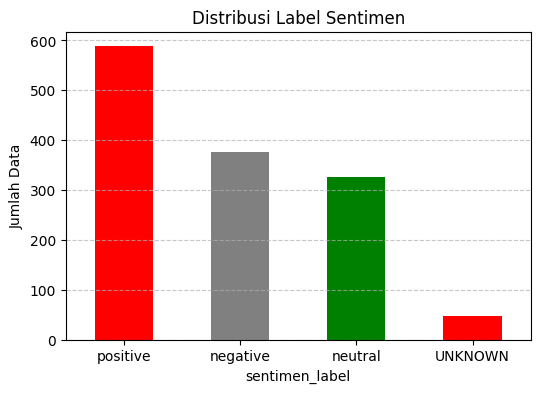

In [17]:
# Plot distribusi label
plt.figure(figsize=(6, 4))
sentiment_count.plot(kind='bar', color=['red', 'gray', 'green'])

plt.title('Distribusi Label Sentimen')
plt.xlabel('sentimen_label')
plt.ylabel('Jumlah Data')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [18]:
# Menampilkan semua data dengan label 'UNKNOWN'
unknown_reviews = df[df['sentiment_label'] == 'UNKNOWN']

# Melihat jumlahnya untuk konfirmasi
print(f"Jumlah data UNKNOWN: {len(unknown_reviews)}")

# Menampilkan beberapa contoh review
print(unknown_reviews.head(47))  # tampilkan 10 review pertama

Jumlah data UNKNOWN: 47
                            user                      comment  \
60              @arissismaya4992         ​ @PalupiIrwantika 😂   
76                    @Kakiku_Go                           😊😊   
100              @Potretfenomena                        ❤❤❤❤❤   
110                   @aboenabil   @cerdasbersama642  1:23:20   
128               @xsaputrobayux                         👐👐🤝🤝   
154                @RatmiNingrum                         😊😊😊😊   
194           @zainulrozikin2061                            😢   
255                @sulasari7799             ​ @SatiDuaTiga 😂   
256                 @sopyan_amkg           ​ @SatiDuaTiga 😅😅😅   
371                 @ojankun6921        ​ @suararepublikan 😂😂   
373            @bayuwahyuadi7198                          😅😊😊   
422         @PasukanRevolusi-x1w                            🔥   
423               @norichnostory                            🔥   
424                @RevolusiReal                            🔥   
6

In [19]:
# Hapus baris dengan label 'UNKNOWN'
df = df[df['sentiment_label'] != 'UNKNOWN']

# Reset ulang index agar rapi
df = df.reset_index(drop=True)

# Cek ulang distribusi setelah penghapusan
print(df['sentiment_label'].value_counts())

sentiment_label
positive    588
negative    376
neutral     325
Name: count, dtype: int64


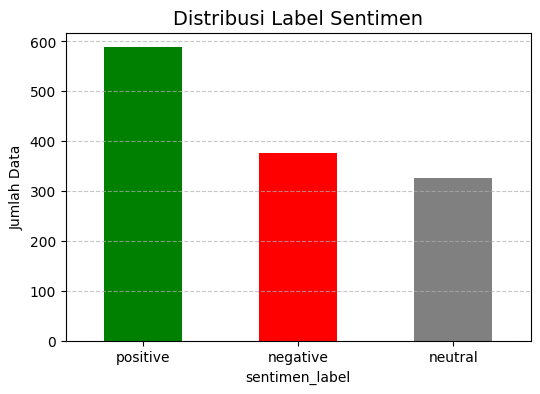

In [22]:
# Hitung jumlah label setelah drop
sentiment_count = df['sentiment_label'].value_counts()
# Plot distribusi label
plt.figure(figsize=(6, 4))
sentiment_count.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Distribusi Label Sentimen', fontsize=14)
plt.xlabel('sentimen_label')
plt.ylabel('Jumlah Data')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Labeling Encoding

In [24]:
dict_label_sentimen = {}
label_classes = []
index = 0
for label in df['sentiment_label']:
  if label not in dict_label_sentimen:
    dict_label_sentimen[label] = index
    label_classes.append(label)
    index += 1

In [25]:
label_order = ['negative', 'neutral', 'positive']
dict_label_sentimen = {label: i for i, label in enumerate(label_order)}

df['sentiment_encoded'] = df['sentiment_label'].apply(lambda x: dict_label_sentimen[x])

In [26]:
dict_label_sentimen

{'negative': 0, 'neutral': 1, 'positive': 2}

In [27]:
df

,user,comment,time,votes,Case Folding,stopword removal,Lemmatization,tokens,stemming,sentiment_label,sentiment_score,sentiment_encoded
0,@arismhvideo4891,"Seorang Mentri keuangan, diwawancara oleh seor...",1 day ago,1.8K,seorang mentri keuangan diwawancara oleh seora...,seorang mentri keuangan diwawancara seorang ek...,orang tri uang wawancara orang ekonom pikir sa...,"[orang, tri, uang, wawancara, orang, ekonom, p...",orang tri uang wawancara orang ekonom pikir sa...,neutral,0.906869,1
1,@project2226,Ngerasa nguping pembicaraan yang ga seharusnya...,2 days ago,2.6K,ngerasa nguping pembicaraan yang ga seharusnya...,ngerasa nguping pembicaraan ga rakyat biasa de...,ngerasa nguping bicara ga rakyat biasa dengar ...,"[ngerasa, nguping, bicara, ga, rakyat, biasa, ...",ngerasa nguping bicara ga rakyat biasa dengar ...,negative,0.996375,0
2,@alexanderthegreat1466,Ayahku cuman tukang rumput ibuku tukang sapu d...,1 day ago,1.1K,ayahku cuman tukang rumput ibuku tukang sapu d...,ayahku cuman tukang rumput ibuku tukang sapu a...,ayah cuman tukang rumput ibu tukang sapu aku l...,"[ayah, cuman, tukang, rumput, ibu, tukang, sap...",ayah cuman tukang rumput ibu tukang sapu aku l...,negative,0.891836,0
3,@rizky_wacaw,"Pak Purbaya serasa lebih serius ngbrol disini,...",1 day ago,278,pak purbaya serasa lebih serius ngbrol disini ...,pak purbaya serasa lebih serius ngbrol disini ...,pak purbaya serasa lebih serius ngbrol sini te...,"[pak, purbaya, serasa, lebih, serius, ngbrol, ...",pak purbaya serasa lebih serius ngbrol sini te...,positive,0.995929,2
4,@duniabahari1695,"Inii baruu sparing partner yg sepadan, penonto...",1 day ago,168,inii baruu sparing partner yg sepadan penonton...,inii baruu sparing partner yg sepadan penonton...,ini baruu sparing partner yg padan tonton bera...,"[ini, baruu, sparing, partner, yg, padan, tont...",baruu sparing partner yg padan tonton berasaa ...,neutral,0.782617,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1284,@raihanalbanna,"​ @gwirjawan Thanks, Pak Gita. Appreciate it,...",1 day ago,0,thanks pak gita appreciate it really enjoying ...,thanks pak gita appreciate it really enjoying ...,thanks pak gita appreciate it really enjoying ...,"[thanks, pak, gita, appreciate, it, really, en...",thanks pak gita appreciate it really enjoying ...,positive,0.989216,2
1285,@ElLora-t3x,Cair cair,1 day ago,0,cair cair,cair cair,cair cair,"[cair, cair]",cair cair,neutral,0.588578,1
1286,@dendiepie1547,​ @ElLora-t3x apa tug cair? Lu pikir komentar...,1 day ago,0,t3x apa tug cair lu pikir komentar kritis buzz...,tx apa tug cair lu pikir komentar kritis buzze...,tx apa tug cair lu pikir komentar kritis buzze...,"[tx, apa, tug, cair, lu, pikir, komentar, krit...",tx apa tug cair lu pikir komentar kritis buzze...,negative,0.998946,0
1287,@galielsabastian6454,MAHAL!,6 hours ago,0,mahal,mahal,mahal,[mahal],mahal,negative,0.998347,0


Pembagian dataset

In [28]:
X = df['stemming'].to_numpy()
y = df['sentiment_encoded'].to_numpy()

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [30]:
sentiment_counts = {
    'Positive': np.array([0, 0]),
    'Negative': np.array([0, 0]),
    'Neutral': np.array([0, 0])
}

In [32]:
sentiment_counts = {label: [0, 0] for label in label_classes}

for label in y_train:
    sentiment_counts[label_classes[label]][0] += 1

for label in y_test:
    sentiment_counts[label_classes[label]][1] += 1

In [33]:
sentiment_counts[label_classes[label]]

[481, 107]

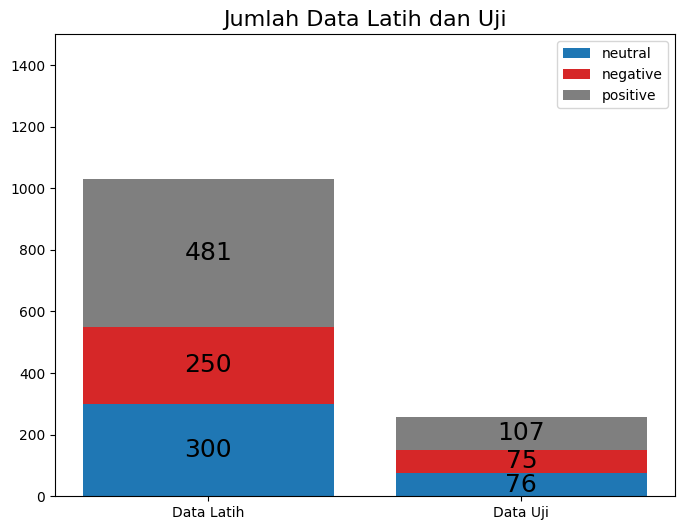

In [35]:
fig, ax = plt.subplots(figsize=(8,6))

bottom = np.zeros(2)
index_color = 0

data_horizontal = ('Data Latih', 'Data Uji')
bar_colors = ['tab:blue', 'tab:red', 'tab:gray']
width = 0.8  # the width of the bars: can also be len(x) sequence

for label, jumlah_sentimen in sentiment_counts.items():
    p = ax.bar(data_horizontal, jumlah_sentimen, width, label=label, bottom=bottom, color=bar_colors[index_color])

    if label == "Neutral":
        # tampilkan di bagian atas (edge) dengan sedikit jarak
        ax.bar_label(p, labels=[f"{v:.0f}" for v in jumlah_sentimen],
                     label_type='edge', padding=5, color='black', size=18)
    else:
        ax.bar_label(p, labels=[f"{v:.0f}" for v in jumlah_sentimen],
                     label_type='center', color='black', size=18)

    bottom += jumlah_sentimen
    index_color += 1

ax.set_title('Jumlah Data Latih dan Uji', fontsize=16)
ax.legend()
ax.set_ylim(0, 1500)
plt.show()

Ekstrasi Fitur (TF-IDF)


In [36]:
tfidf = TfidfVectorizer(
    tokenizer=lambda x: x,
    preprocessor=lambda x: x,
    token_pattern=None
)

In [37]:
tfidf.fit(X_train)

TfidfVectorizer(preprocessor=<function <lambda> at 0x7ab497e2f740>,
                token_pattern=None,
                tokenizer=<function <lambda> at 0x7ab497e2ef20>)

In [38]:
X_train = tfidf.transform(X_train)
X_test = tfidf.transform(X_test)

# Klasifikasi dengan menggunakan Decision Tree

Training

In [39]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [41]:
model_decision_tree = DecisionTreeClassifier(
    criterion="entropy", random_state=0, max_depth=1, min_samples_split = 12
    )

In [42]:
model_decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_split=12,
                       random_state=0)

Testing dan Hasil evaluasi


In [43]:
y_pred = model_decision_tree.predict(X_test)

In [44]:
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [45]:
y_test

array([2, 1, 2, 2, 2, 2, 0, 2, 1, 0, 1, 1, 2, 1, 1, 1, 2, 2, 0, 2, 2, 2,
       2, 0, 0, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 1, 0, 2, 0, 0, 2, 1, 0, 0,
       2, 2, 1, 0, 2, 1, 2, 2, 0, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2,
       2, 1, 2, 2, 1, 1, 2, 2, 0, 2, 0, 1, 0, 2, 2, 0, 2, 2, 1, 2, 0, 0,
       2, 0, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 1, 0, 0, 1, 2, 2, 1, 1, 2, 1,
       2, 0, 2, 1, 1, 0, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 2, 0, 1, 2, 0,
       1, 2, 2, 0, 1, 0, 0, 2, 0, 1, 2, 2, 2, 0, 1, 1, 0, 2, 0, 1, 2, 1,
       0, 2, 1, 1, 2, 0, 0, 2, 1, 1, 0, 1, 2, 1, 0, 0, 0, 0, 2, 1, 0, 2,
       2, 2, 2, 2, 2, 1, 0, 0, 1, 2, 2, 0, 2, 0, 1, 0, 2, 0, 0, 0, 2, 1,
       0, 1, 2, 2, 0, 2, 0, 2, 1, 2, 2, 0, 1, 1, 1, 2, 0, 2, 2, 1, 2, 0,
       2, 0, 1, 2, 2, 0, 2, 1, 1, 1, 2, 0, 1, 2, 2, 0, 2, 0, 1, 0, 2, 1,
       2, 0, 2, 0, 1, 1, 0, 2, 2, 2, 2, 0, 2, 1, 2, 2])

In [47]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
accuracy_score(y_test, y_pred)

0.41472868217054265

Akurasi: 0.41472868217054265

Classification Report:

              precision    recall  f1-score   support

     neutral       0.00      0.00      0.00        76
    negative       0.00      0.00      0.00        75
    positive       0.41      1.00      0.59       107

    accuracy                           0.41       258
   macro avg       0.14      0.33      0.20       258
weighted avg       0.17      0.41      0.24       258



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


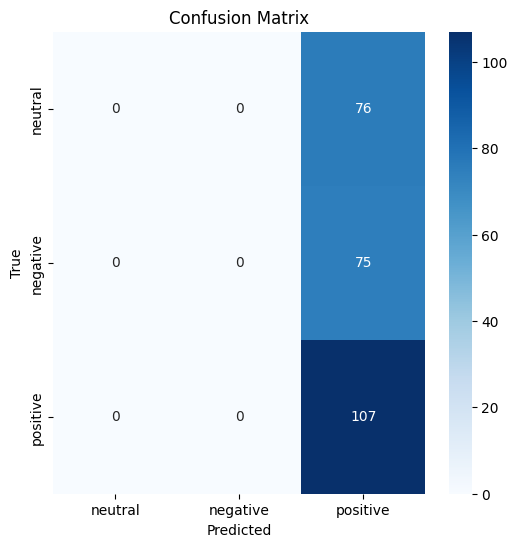

In [48]:
# Evaluasi
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=label_classes))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=label_classes,
            yticklabels=label_classes,
            cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [49]:
tfidf.get_feature_names_out()

array([' ', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l',
       'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y',
       'z'], dtype=object)

In [50]:
nama_fitur = tfidf.get_feature_names_out()

dot_data = export_graphviz(model_decision_tree, out_file=None, feature_names=nama_fitur,
                           class_names=np.array(label_classes))

In [51]:
import pydotplus
from IPython.display import Image

In [53]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())
graph.write_png("Sentimen Ulasan_youtube_comments_Purbaya X Gita Wirjawan.png")

True

Eksperimen

In [54]:
max_depth_list = [i for i in range(1, 20)]
min_samples_split_list = [i for i in range(1, 20)]
random_state_list = [i for i in range(1, 20)]
test_size_list = [i/100 for i in range(20, 41)]

In [55]:
top_accuracy_score = 0
top_test_size = 0
top_max_depth = 0
top_min_samples_split = 0
top_random_state = 0

for test_size in test_size_list:
  for max_depth in max_depth_list:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    tfidf.fit(X_train)
    X_train = tfidf.transform(X_train)
    X_test = tfidf.transform(X_test)

    model_decision_tree = DecisionTreeClassifier(
      criterion="entropy", random_state=42, max_depth = max_depth
    )
    model_decision_tree.fit(X_train, y_train)
    y_pred = model_decision_tree.predict(X_test)

    if accuracy_score(y_test, y_pred) > top_accuracy_score:
      top_accuracy_score = accuracy_score(y_test, y_pred)
      top_test_size = test_size
      top_max_depth = max_depth

In [56]:
print("akurasi tertinggi: ", top_accuracy_score)
print("max depth        : ", top_max_depth)
print("test size        : ", top_test_size)

akurasi tertinggi:  0.5031446540880503
max depth        :  3
test size        :  0.37
